<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Hierarchical Clustering</center>

Welcome to Lab of Hierarchical Clustering with Python using Scipy and Scikit-learn package.

#  Hierarchical Clustering - Agglomerative

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

In [ ]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
import matplotlib.pyplot as plt 
from sklearn import manifold 
from sklearn.cluster import AgglomerativeClustering 
%matplotlib inline

## Read data
lets read dataset to see what features the manufacturer has collected about the existing models.

In [ ]:
filename = 'dataset_hotel_bookings.csv'
df = pd.read_csv(filename)
print ("Shape of dataset: ", df.shape)

df.head(5)

The featuresets include  price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

### Feature selection
Lets select our feature set:

In [ ]:
X = df[['lead_time',  'arrival_date_month', 'adults', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']]
from sklearn.preprocessing import MinMaxScaler
x = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

## Clustering using Scipy
In this part we use Scipy package to cluster the dataset:  
First, we calculate the distance matrix. 

In [40]:
import scipy
import pylab
import scipy.cluster.hierarchy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
# Random sampling
sample_size = 5000  # Adjust as needed
indices = np.random.choice(feature_mtx.shape[0], sample_size, replace=False)
sampled_feature_mtx = feature_mtx[indices]

# Compute the distance matrix on the smaller dataset
leng = smaller_feature_mtx.shape[0]
D = np.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(smaller_feature_mtx[i], smaller_feature_mtx[j])
        
condensed_dist_matrix = pdist(sampled_feature_mtx, metric='euclidean')
Z = hierarchy.linkage(condensed_dist_matrix, 'complete')

In [41]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Also, you can determine the number of clusters directly:

In [42]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([5, 2, 5, ..., 3, 2, 5], dtype=int32)

Now, plot the dendrogram:

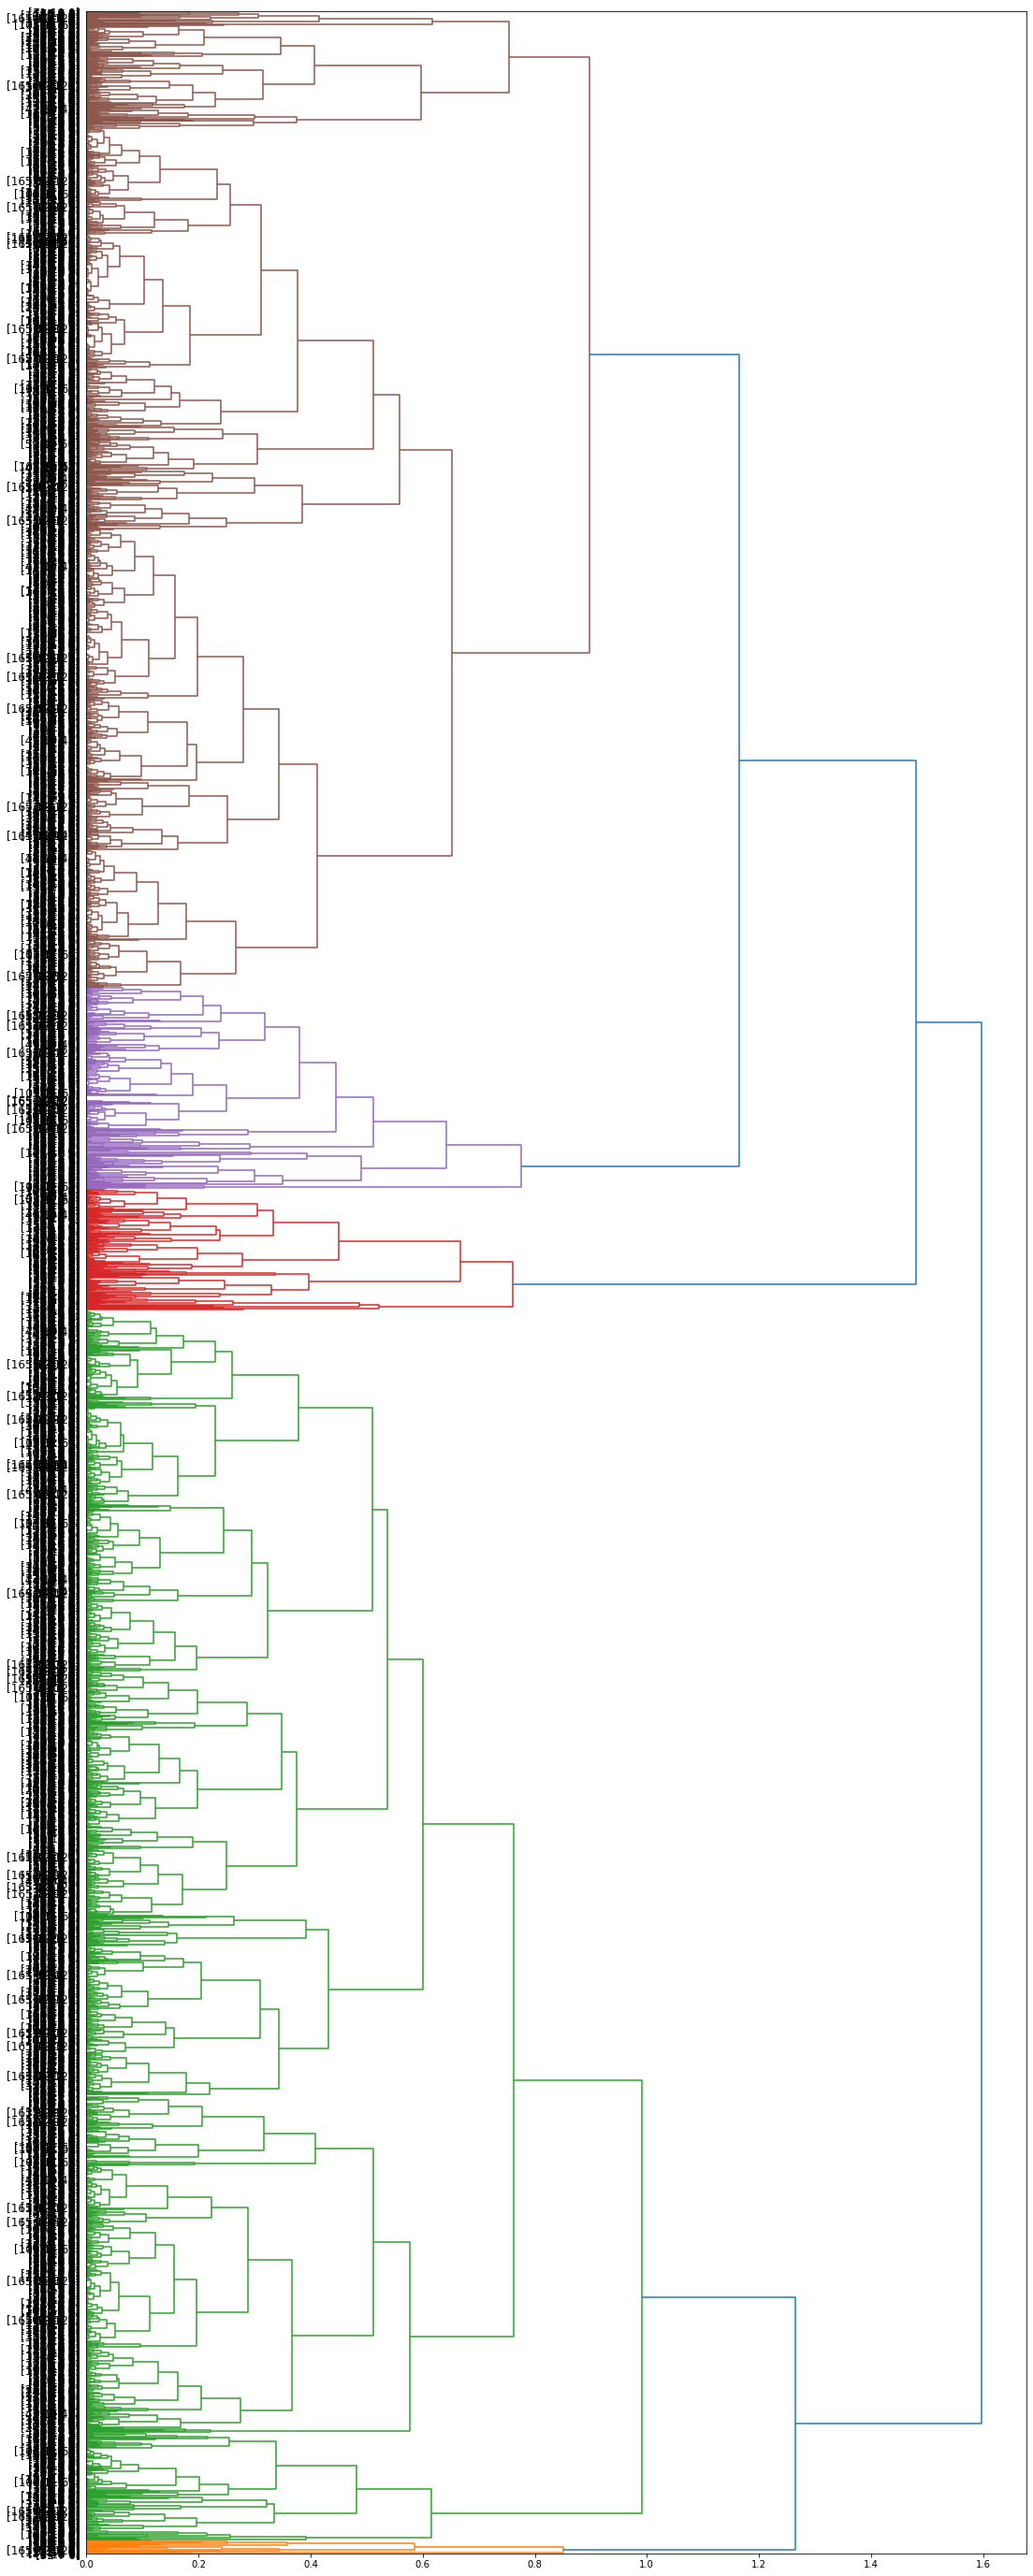

In [43]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['lead_time'][id], df['arrival_date_month'][id], df['days_in_waiting_list'][id] )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Clustering using scikit-learn
Lets redo it again, but this time using scikit-learn package:

In [46]:
dist_matrix = distance_matrix(sampled_feature_mtx,sampled_feature_mtx) 
print(dist_matrix)

[[0.         0.48233673 0.20990164 ... 0.77548294 0.62534333 0.19723422]
 [0.48233673 0.         0.51359993 ... 0.46551311 0.25664604 0.56484105]
 [0.20990164 0.51359993 0.         ... 0.67939247 0.63021473 0.24816421]
 ...
 [0.77548294 0.46551311 0.67939247 ... 0.         0.42610566 0.8303487 ]
 [0.62534333 0.25664604 0.63021473 ... 0.42610566 0.         0.64981255]
 [0.19723422 0.56484105 0.24816421 ... 0.8303487  0.64981255 0.        ]]


Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [48]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(sampled_feature_mtx)
agglom.labels_

array([0, 3, 0, ..., 2, 3, 0], dtype=int64)

And, we can add a new field to our dataframe to show the cluster of each row:

In [61]:
subset_df = df.sample(n=5000)
subset_df['cluster_'] = agglom.labels_
subset_df.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
48986       0            1        101               2016                   4   
40638       0            0         28               2015                   8   
106134      0            0          2               2017                   2   
16703       1            0        167               2015                   9   
110591      0            0        153               2017                   4   

        arrival_date_week_number  arrival_date_day_of_month  \
48986                         15                          4   
40638                         32                          3   
106134                         7                         17   
16703                         36                          1   
110591                        17                         27   

        stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
48986                         1                     2       2  ...   
40638                         1                     3       3  ...   
106134                        2                     3       1  ...   
16703                         2                     5       2  ...   
110591                        0                     2       2  ...   

          customer_type    adr required_car_parking_spaces  \
48986         Transient  80.00                           0   
40638   Transient-Party  84.00                           0   
106134        Transient  78.54                           0   
16703         Transient  73.80                           0   
110591        Transient  96.25                           0   

       total_of_special_requests reservation_status reservation_status_date  \
48986                          0           Canceled              2016-02-04   
40638                          0          Check-Out              2015-08-07   
106134                         0          Check-Out              2017-02-22   
16703                          0          Check-Out              2015-09-08   
110591                         0          Check-Out              2017-04-29   

        var_r  filter_$  arrival_month cluster_  
48986     245         1              4        0  
40638     245         0              8        3  
106134    245         1              2        0  
16703     245         0              9        0  
110591    245         1              4        3  

[5 rows x 36 columns]

Text(0, 0.5, 'days_in_waiting_list')

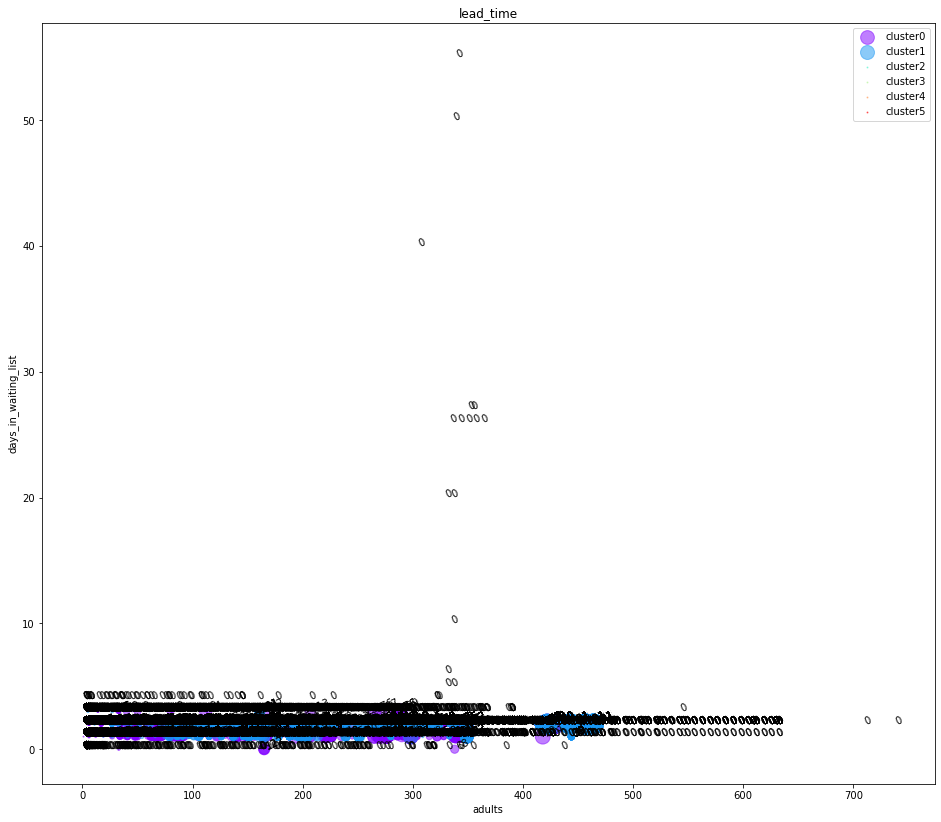

In [62]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.is_canceled == label]
    for i in subset.index:
        plt.text(subset.lead_time[i], subset.adults[i], str(subset.days_in_waiting_list[i]), rotation=25) 
    plt.scatter(subset.lead_time, subset.adults, s=subset.days_in_waiting_list, color=color, label='cluster'+str(label), alpha=0.5)
plt.legend()
plt.title('lead_time')
plt.xlabel('adults')
plt.ylabel('days_in_waiting_list')